In [ ]:
import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt
#from google.colab import files
#uploaded =  files.upload()

In [ ]:
data = pd.read_csv('Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
x = data.iloc[:, 1:-1].values
#x
y = data.iloc[:, -1].values
#y
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
x = scx.fit_transform(x)
y = scy.fit_transform(y)
#x
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = "rbf")
svr.fit(x,y)
scy.inverse_transform(svr.predict(scx.transform([[6.5]])))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([170370.0204065])

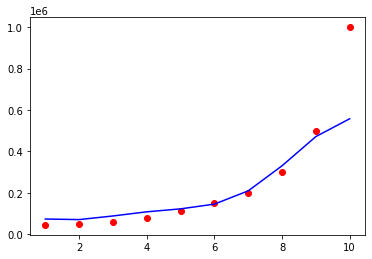

In [ ]:
plt.scatter(scx.inverse_transform(x), scy.inverse_transform(y), color = "red")
plt.plot(scx.inverse_transform(x), scy.inverse_transform(svr.predict(x)), color = "blue")
plt.show()